In [26]:
#################################################
### Auther: Asiri Amal              #############
### Title: Comic Bubble Extractor   #############
### Date : 08/02/2020               #############
#################################################

## Description:
* This version uses free OCR (optical Character Recognition) from https://ocr.space/ 

* This is an accurate version of Extracting Comic Bubbles 
* Free API key is only working for 10-15 images
* If you think it is worth to use more please subscribe an API key for multiple uses from https://sites.fastspring.com/a9t9/instant/ocr-api-pro

## Install

###  Execute below code by using command/conda promt in the location
pip3 install -r requirements.txt

In [27]:
# Libraries

import cv2
from matplotlib import pyplot as plt
import os
from matplotlib import image
from skimage.io import imread, imsave
import requests
import io
import json

## Please Set Below values if you want to change

#### Get your api key from https://ocr.space/

In [28]:
# Here I am using a free API key it gives 10 -15 images per day
# api_key = "a630292eec88957"
api_key = "b1c25cb7ec88957"

In [29]:
### Set path values
# Initial path values are in the folder structure
# Input Images -> './sample'

input_path = "./sample/"

output_path = "OCR_SPACE_PREDICTIONS/"

try:
    os.mkdir(output_path)
    print("Output File: {:s} has been created".format(output_path))
except FileExistsError:
    print("File Already Exists...!")

File Already Exists...!


In [30]:
imglist = os.listdir(input_path)
imageList = [(lambda x: input_path +x)(x) for x in imglist]

In [31]:
##########################################################################################

In [32]:
def plot(img):
    plt.figure(figsize = (15,20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [33]:
def remove_dup(croppedImageDimList):
    for j in croppedImageDimList:
        x1 = j[0]
        y1 = j[1]
        x2 = j[2]
        y2 = j[3]
        for i in croppedImageDimList:
            x3 = i[0]
            y3 = i[1]
            x4 = i[2]
            y4 = i[3]
            if (x1 > x3) and  (x2 <= x4) and (y1 >= y3) and (y2 <= y4):
                croppedImageDimList.remove(j)
                break

In [34]:
# OCR
def ocr(img):
    url_api = "https://api.ocr.space/parse/image"
    _, compressedimage = cv2.imencode(".jpg", img, [1, 90])
    file_bytes = io.BytesIO(compressedimage)

    results = requests.post(url_api,
                   files={"screensho.jpg": file_bytes},
                  data={"apikey": api_key})

    result =  results.content.decode()
    result = json.loads(result)

#     try:
#         text_detected = result.get('ParsedResults')[0].get('ParsedText')
#     except:
#         print("Please update your api key")
#         break  
    text_detected = result.get('ParsedResults')[0].get('ParsedText')
    

    length = len(text_detected)

    tes =  text_detected.replace('\r', ' ')
    tes = tes.replace("\n", " ")
    
    return tes, length

In [35]:
# find all speech bubbles in the given comic page and return a list of cropped speech bubbles (with possible false positives)
def findSpeechBubbles(imagePath, method = 'simple'):
    color = (255, 0, 0) 
    # read image
    image = cv2.imread(imagePath)

    # gray scale
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # filter noise
    imageGrayBlur = cv2.GaussianBlur(imageGray,(3,3),0)
    if method != 'simple':
        # recognizes more complex bubble shapes
        imageGrayBlurCanny = cv2.Canny(imageGrayBlur,50,500)
        binary = cv2.threshold(imageGrayBlurCanny,235,255,cv2.THRESH_BINARY)[1]
    else:
        # recognizes only rectangular bubbles
        binary = cv2.threshold(imageGrayBlur,235,255,cv2.THRESH_BINARY)[1]
    # find contours
    contours = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]
    # get the list of cropped speech bubbles
    croppedImageList = []
    croppedImageDimList = []
    for contour in contours:
        rect = cv2.boundingRect(contour)
        [x, y, w, h] = rect
        start_point = (x,y) 
        end_point = (x+w, y+h)
        # filter out speech bubble candidates with unreasonable size
       
        if w < 400 and w > 60 and h < 500 and h > 25:
            croppedImage = image[y:y+h, x:x+w]
            croppedImageDim = [x, y, x+w, y+h]
            
            tes, length = ocr(croppedImage)
            if length >=2 :
                croppedImageDimList.append(croppedImageDim)
            
            croppedImageList.append(croppedImage)

    remove_dup(croppedImageDimList)
    remove_dup(croppedImageDimList)
    
    for i in croppedImageDimList:
        img = cv2.rectangle(image, (i[0], i[1]), (i[2], i[3]), color, 5) 

    return croppedImageList, croppedImageDimList, img

In [36]:
##############################################################################

In [37]:
# img = cv2.imread(imageList[0])
# plot(img)

In [38]:
for i in range(len(imageList)):
    output_image = output_path +imglist[i]+".jpg"
    try:
        croppedImageList, croppedImageDimList, img = findSpeechBubbles(imageList[i])
        cv2.imwrite(output_image, img)
        print("Image \"{:s}\" Has been saved.. Number of Images Saved : {:d}".format(output_image, i+1))
    except AttributeError:
        print("Please update API key visit:  https://ocr.space/")
        break

Image "OCR_SPACE_PREDICTIONS/sample-0.png.jpg" Has been saved.. Number of Images Saved : 1
Image "OCR_SPACE_PREDICTIONS/sample-1.png.jpg" Has been saved.. Number of Images Saved : 2
Image "OCR_SPACE_PREDICTIONS/sample-10.png.jpg" Has been saved.. Number of Images Saved : 3
Image "OCR_SPACE_PREDICTIONS/sample-11.png.jpg" Has been saved.. Number of Images Saved : 4
Image "OCR_SPACE_PREDICTIONS/sample-12.jpg.jpg" Has been saved.. Number of Images Saved : 5
Image "OCR_SPACE_PREDICTIONS/sample-13.jpg.jpg" Has been saved.. Number of Images Saved : 6
Image "OCR_SPACE_PREDICTIONS/sample-14.jpg.jpg" Has been saved.. Number of Images Saved : 7
Image "OCR_SPACE_PREDICTIONS/sample-15.jpg.jpg" Has been saved.. Number of Images Saved : 8
Image "OCR_SPACE_PREDICTIONS/sample-16.jpg.jpg" Has been saved.. Number of Images Saved : 9
Image "OCR_SPACE_PREDICTIONS/sample-17.jpg.jpg" Has been saved.. Number of Images Saved : 10
Image "OCR_SPACE_PREDICTIONS/sample-18.jpg.jpg" Has been saved.. Number of Images

In [47]:
# img = cv2.imread(imageList[0])

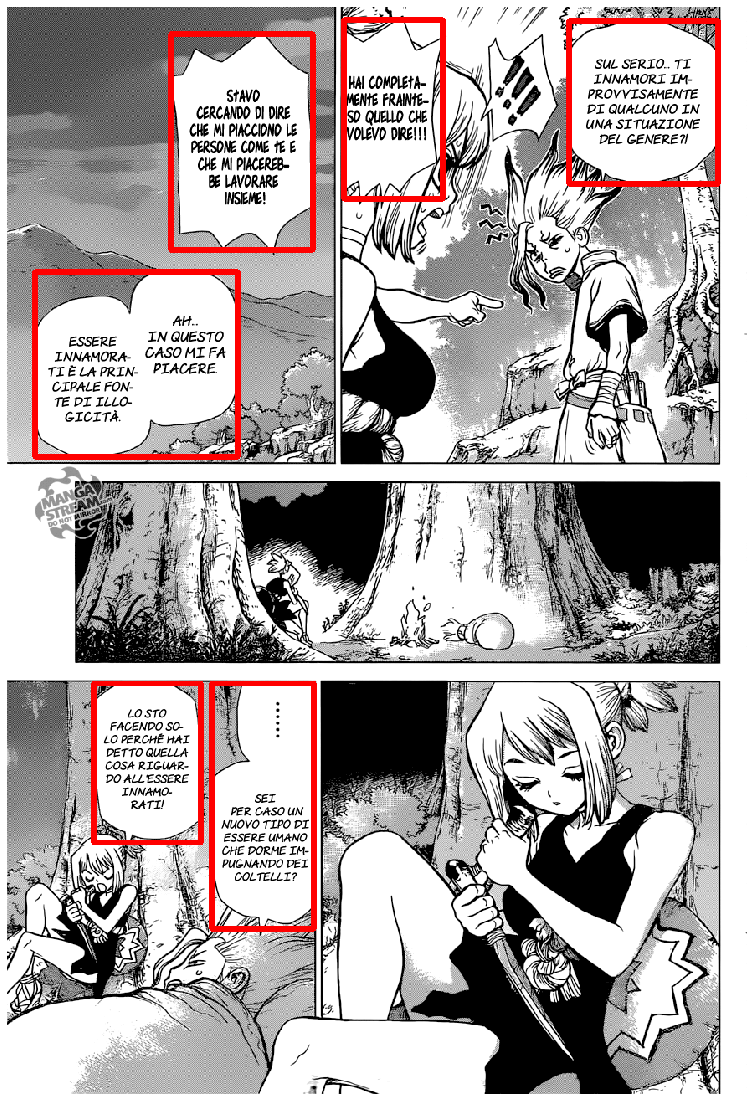

In [39]:
plot(img)